# Compute Selection - Vision

Under this scenario, a score from 0-10, with 10 being closest match, is generated comparing a baseline response against an actual response.

In [1]:
import common
import os
from PIL import Image
import requests
from io import BytesIO

In [2]:
# Get a configured model
client = common.get_openai_client(
        api_key=common.api_KEY,
        api_version=common.api_version,
        azure_endpoint=common.api_URI)

In [3]:
def call_openai(url:str,prompt:str,max_tokens=1000,temperature=0.2):
    response = client.chat.completions.create(
            model=common.gpt_api_deployment,
            messages=[
                {
                "role": "system",
                "content": "You are a helpful assistant that can help provide a compute recommendation based on the provided information. Use only the provided information."
                },
                {
                "role": "user",
                "content": [
                    {"type": "text", "text": prompt},
                    {
                    "type": "image_url",
                    "image_url": {
                        "url": url,
                        "detail": "high"
                    },
                    },
                ],
                }
            ],
            max_tokens=max_tokens,
            temperature=temperature
        )
    return str(response.choices[0].message.content)

In [4]:
def get_image(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img = img.resize((img.width//2, img.height//2))
    return img


In [5]:
url = "https://alemoraoaist.z13.web.core.windows.net/images/compute-diagram.png"


In [6]:
def full_process(url, question):
    print("Image:")
    get_image(url).show()
    print("User:")
    common.split_sentence(question)
    print("\nAssistant:")
    ans = call_openai(url,question)
    common.split_sentence(ans)

Image:


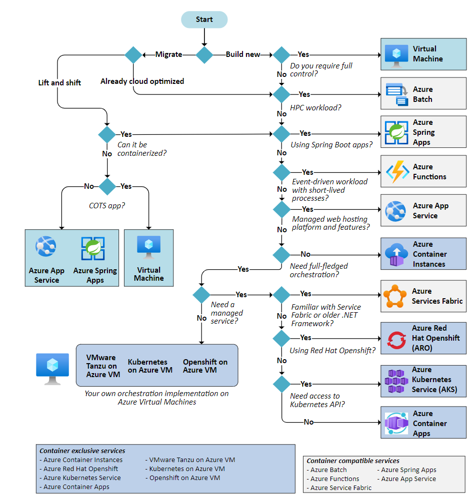

User:
Describe what is in the image.

Assistant:
The image is a flowchart decision tree for choosing the appropriate Microsoft Azure compute service based on specific
requirements. It starts with a decision between migrating an existing application or building a new one. Depending on
the answers to subsequent questions, such as the need for full control, high-performance computing (HPC) workloads, use
of Spring Boot apps, event-driven workloads, managed web hosting features, full-fledged orchestration, familiarity with
Service Fabric or .NET Framework, or the use of Red Hat Openshift, the flowchart guides you to the most suitable Azure
service. The services include Virtual Machine, Azure Batch, Azure Spring Apps, Azure Functions, Azure App Service, Azure
Container Instances, Azure Services Fabric, Azure Red Hat Openshift (ARO), Azure Kubernetes Service (AKS), and Azure
Container Apps. Additionally, there are sections for "Container exclusive services" and "Container compatible services

In [7]:
question = "Describe what is in the image."
full_process(url, question)

Image:


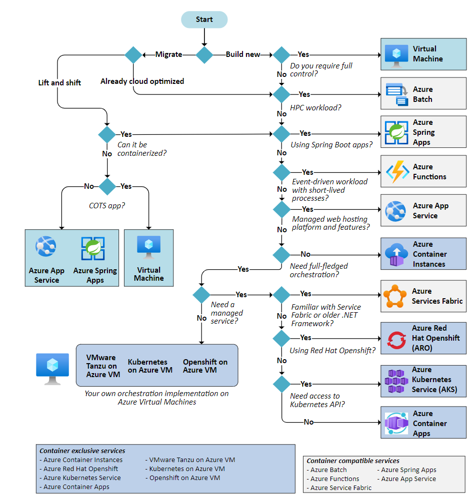

User:
Based on the diagram, what is the best recommendation for compute if I am familiar with deploying containers? Explain
the recommendation.

Assistant:
Based on the diagram, if you are familiar with deploying containers, the best recommendation for compute would be Azure
Kubernetes Service (AKS). The decision flow suggests that if you need full-fledged orchestration for your containers,
and you need access to Kubernetes API, AKS is the appropriate choice. AKS provides a managed Kubernetes service that
simplifies the deployment, management, and operations of Kubernetes, allowing you to focus on your applications rather
than the infrastructure. It integrates deeply with Azure services and has the added benefits of Azure's security,
scalability, and identity management.


In [10]:
question = "Based on the diagram, what is the best recommendation for compute if I am familiar with deploying containers? Explain the recommendation."
full_process(url, question)

Image:


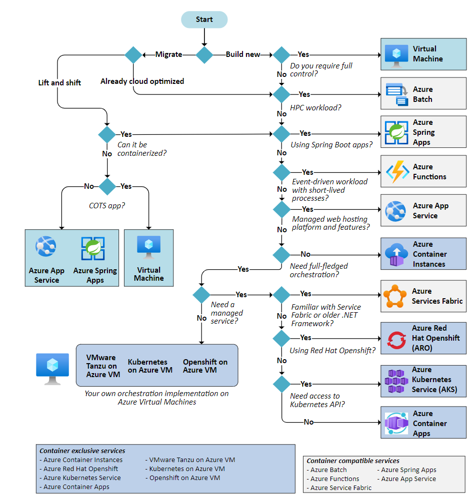

User:
Based on the diagram, what is the best recommendation if I am lifting and shifting an existing commercial Java
application?

Assistant:
Based on the diagram, if you are lifting and shifting an existing commercial Java application, the best recommendation
would be to use Azure App Service, Azure Spring Apps, or a Virtual Machine. These options are presented under the "Can
it be containerized?" decision point, which leads to the "COTS app?" (Commercial Off-The-Shelf application) decision
point. Since you are lifting and shifting an existing application, it is implied that it is a COTS app, and therefore,
these three services are your recommended options.


In [11]:
question = "Based on the diagram, what is the best recommendation if I am lifting and shifting an existing commercial Java application?"
full_process(url, question)